## 1.Introduction

### Latar Belakang
saya adalah seorang Data Scientist yang ingin menganalisis tarif taksi online antara lyfe dan uber berdasarkan model linier regression. dikarenakan untuk meliat kriteria berdasarkan harga antara kedua taksi belum ada orang menganalisis menggunakan model linier regresi. saya memutuskan untuk membuat prediksi estimasi harga antara kedua taksi tersebut.

### Problem Statement

Membual model machine learning yang dapat melakukan analysis dan simple linier regression model based on the dataset yang sudah di dapat dari link yang sudah disediakan. model ini akan melakukan bagaimana harga atau tarif taksi yang bervariasi dengan semua fitur yang dibuat. 

model akan dievaluasi dengan loss function MAE.

## 2.Import Library

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import pickle
import json
import warnings


from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LinearRegression




## 3.Data Loading

Data yang diambil merupakan dataset Uber dan Lyft untuk melakukan linear regression model, data diambil dari Kaggle.com

In [58]:
# loading data
data = pd.read_csv('rideshare_kaggle.csv')
data


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [59]:
# cek info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [60]:
# cek duplikasi data
data.duplicated().sum()

0

Tidak ada duplikat data 

In [61]:
# cek missing value
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [62]:
# Cek data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

dari rangkuman data diatas didapat :
* RangeIndex: 693071
* Column  : 57

In [63]:
# cek statistik deskriptif data
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


## 4.Exploratory Data Analysis

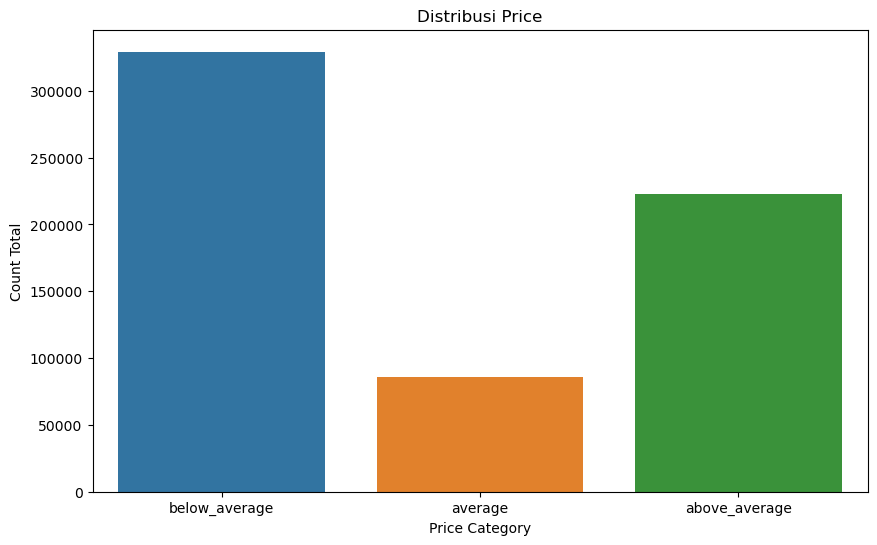

In [64]:
# Menghitung rata-rata salary
average_price = data['price'].mean()

# Menentukan threshold untuk upper_price dan lower_price (misal: 10% dari rata-rata)
threshold = 0.1 * average_price

# Menghitung upper_price, average_price, dan lower_price
upper_price = average_price + threshold
lower_price = average_price - threshold

# Menambahkan kolom 'price_category' berdasarkan kondisi
data['price_category'] = pd.cut(data['price'], bins=[-np.inf, lower_price, upper_price, np.inf], labels=['below_average', 'average', 'above_average'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='price_category', data=data, order=['below_average', 'average', 'above_average'])
plt.title('Distribusi Price')
plt.xlabel('Price Category')
plt.ylabel('Count Total')
plt.show()


dari tabel informasi bar chart diatas dapat dilihat bahwa, distribusi price di bagian `below_average` lebih besar. 

<function matplotlib.pyplot.show(close=None, block=None)>

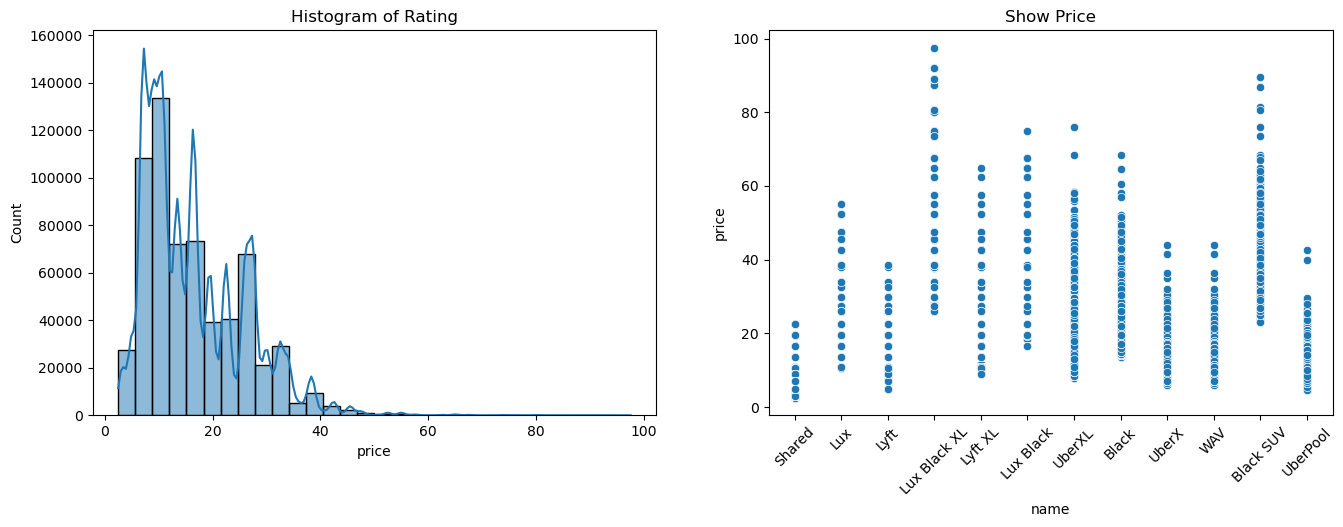

In [65]:
#create histogram and scatter plot

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data['price'], kde=True, bins = 30)
plt.title('Histogram of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x = 'name', y = 'price', data = data)
plt.title('Show Price')
plt.xticks(rotation=45)
plt.show

Pada data barchart diatas dapat di simpulkan bahwa harga price condong di antara 0-20 dan tidak terdistribusi normal. dan untuk scatter plot ditunjukkan bahwa nama group yang yang memiliki rata - rata harga yang tertinggi dah nterendah.

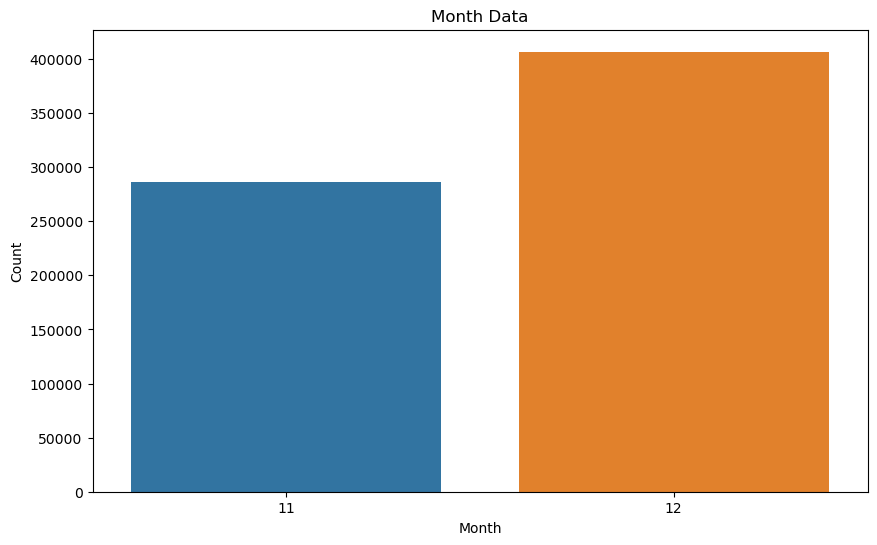

In [66]:
# Create Bar chart
calculate = data.groupby('month')['month'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('Month Data')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Dari data diatas dapat dilihat bahwa hanya terdapat bulan 11 dan 12 di dataset. itu berarti data di ambil pada bulan 11-12 dan keseluruhan data di dominasi pada bulan 12.

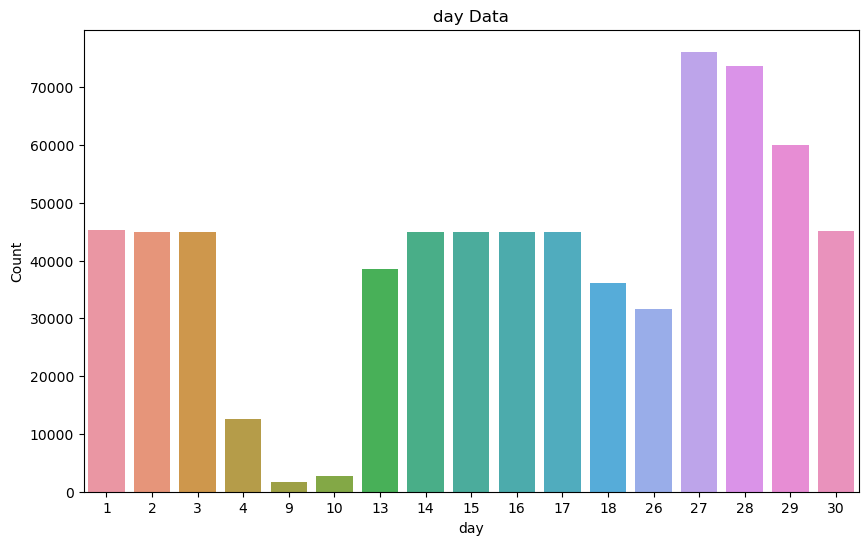

In [67]:
# Create Bar chart
calculate = data.groupby('day')['day'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('day Data')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

Data diatas menunjukan terjadinya gap di data 'day'. contoh nya tidak ada data di hari 5-8. 

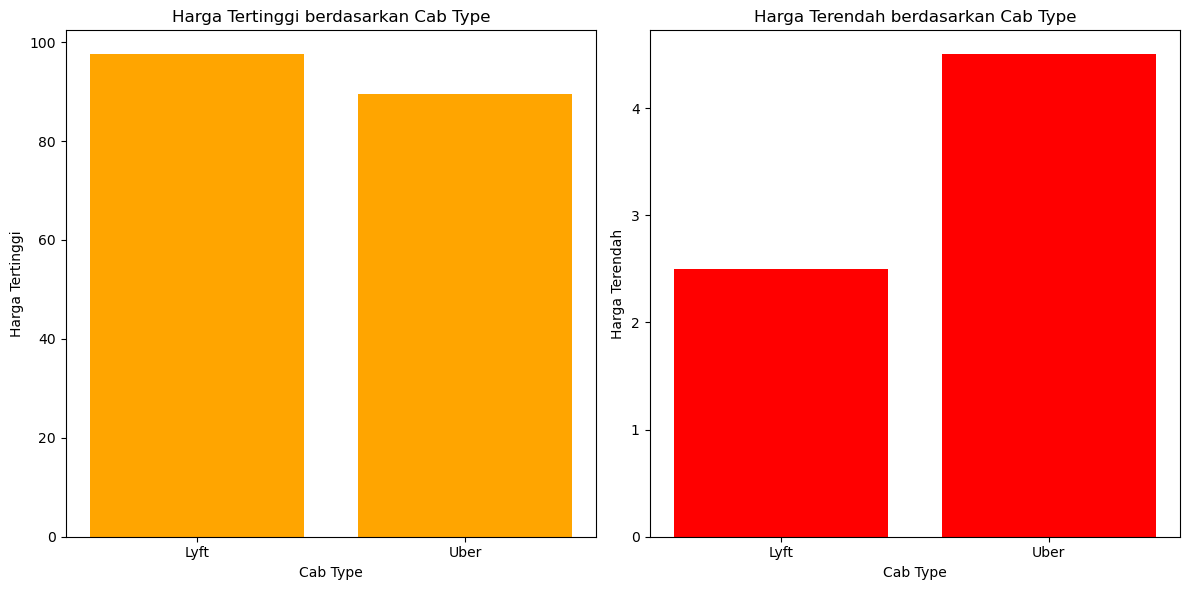

In [68]:
# Hitung harga tertinggi dan terendah untuk setiap cab_type
highest_prices = data.groupby('cab_type')['price'].max()
lowest_prices = data.groupby('cab_type')['price'].min()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(highest_prices.index, highest_prices.values, color='orange')
plt.title('Harga Tertinggi berdasarkan Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Harga Tertinggi')

plt.subplot(1, 2, 2)
plt.bar(lowest_prices.index, lowest_prices.values, color='red')
plt.title('Harga Terendah berdasarkan Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Harga Terendah')

plt.tight_layout()
plt.show()


Data diatas menunjukan persentasi harga tertinggi dan terendah terhadap `lyft dan uber`

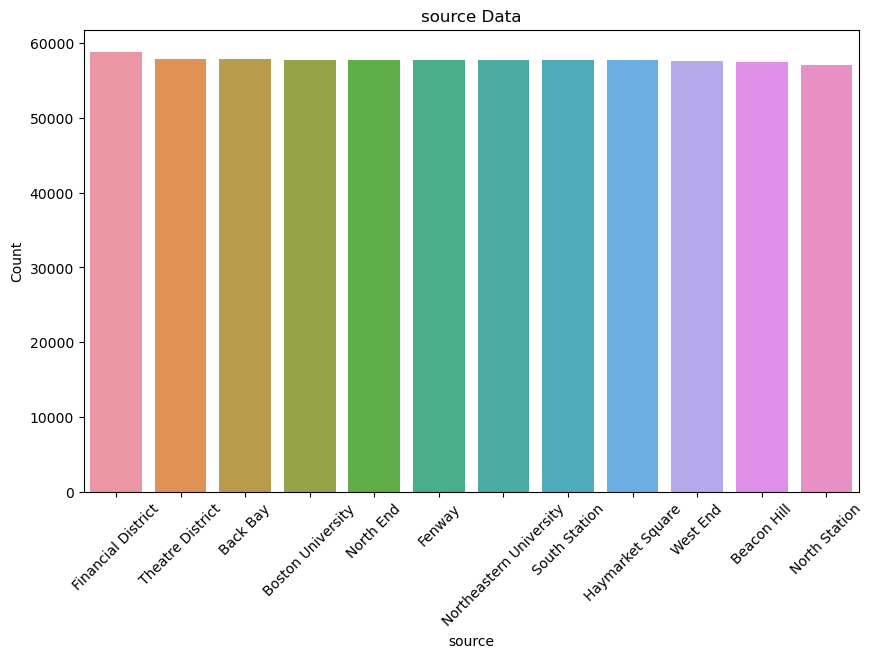

In [69]:
# Create Bar chart
calculate = data.groupby('source')['source'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=calculate.index, y=calculate.values)
plt.title('source Data')
plt.xlabel('source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dapat dilihat dari data diatas bahwa semua source hampir memliki nilai yang sama, semua source memiliki 50k data di semua source fitur.

## 5.Feature Engineering
karena akan melakukan regresi yang merupakan supervised learning, maka data akan dibagi menjadi feature `X` dan label/target `y`. Lalu kedua dataset tersebut juga akan dibagi menjadi `train-set` dan `test-set`.

sebelum split data, terlebih dahulu saya akan membuat  variable baru `data_inf` yang bertujuan untuk train data inference sehingga tidak perlu untuk menginput secara manual di inference

In [70]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = data.sample(1, random_state=0)

# menghapus data inference dari df
data.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus target di data_inf
data_inf.drop(['price'], axis=1, inplace=True)

simpan dataset random ke `csv`

In [71]:
#simpan ke csv
data_inf.to_csv('data_inf')

### Split feature `X` dan target `y`
memisahkan antara label dengan fitur

In [72]:
# split feature x & y
X= data.drop('price', axis=1)
y = data['price']

### Split train and test

memisahkan dataset menjadi 2 bagian yaitu train set untuk dilakukan training, dan test set untuk dilakukan evaluasi


In [73]:
#Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
print('Train size : ', y_train.shape)
print('Test size : ', y_test.shape)

Train size :  (554456, 57)
Test size :  (138614, 57)
Train size :  (554456,)
Test size :  (138614,)


### Handling missing values


dibagian ini saya akan menghandle missing value yang terdapat di dalam data setelah saya split, pertama saya akan drop kolom `price` `id` `timestamp` dikarenakan data tersebut tidak terlalu berpengaruh.

In [74]:
#drop data
X = data.drop(['price', 'id', 'timestamp'], axis=1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [75]:
# cek missing value
y_train_na = y_train[y_train.isnull()==True]
y_test_na = y_test[y_test.isnull()==True]
print(y_train_na.shape)
print(y_test_na.shape)

(43909,)
(11186,)


In [76]:
# drop missing value
y_train = y_train.dropna()
y_test = y_test.dropna()

print('Size y_train : ', y_train.shape)
print('Size y_test  : ', y_test.shape)

Size y_train :  (510547,)
Size y_test  :  (127428,)


In [77]:
# sesuaikan data yang sudah di drop di y ke x
X_train.drop(y_train_na.index, inplace=True)
X_test.drop(y_test_na.index, inplace=True)

In [78]:
# cek hasil
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(510547,)
(127428,)
(510547, 55)
(127428, 55)


### Handle outlier



dibagian ini saya akan menghandle outlier, saya memilih untuk menghandle outlier dibagian `distance` dikarenakan parameter yang saya inginkan adalah keterkaitan antara `price` dan `distance` dalam tolak ukur dalam memprediksi total harga.

yang pertama sebelum handle outlier, saya akan cek skewness nya terlebih dahulu untuk menentukan apakah data termasuk normal distribution atau skew distribution

In [79]:
# Menghitung skewness dari kolom 'distance' di X_train
distance_skewness = skew(X_train['distance'])

print("Skewness dari kolom 'distance':", distance_skewness)


Skewness dari kolom 'distance': 0.8147686162722007


dari hasil yang didapat dari mengece nilai skew dalam data, dapat disimpulkan kalau data termasuk `highly skew distribution` jadi saya akan handle dengan menggunakan `IQR` dengan mengset threshold untuk `Q1 = 0.25` dan `Q3 = 0.75`

In [80]:
# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = X_train['distance'].quantile(0.25)
Q3 = X_train['distance'].quantile(0.75)

# Hitung interquartile range (IQR)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung jumlah outlier sebelum penghapusan
outlier_count_before = len(X_train[(X_train['distance'] < lower_bound) | (X_train['distance'] > upper_bound)])

# Hapus outlier dari X_train dan y_train
X_train = X_train[(X_train['distance'] >= lower_bound) & (X_train['distance'] <= upper_bound)]
y_train = y_train.loc[X_train.index]

# Hitung jumlah outlier setelah penghapusan
outlier_count_after = len(X_train[(X_train['distance'] < lower_bound) | (X_train['distance'] > upper_bound)])

print("Jumlah outlier sebelum penghapusan:", outlier_count_before)
print("Jumlah outlier setelah penghapusan:", outlier_count_after)


Jumlah outlier sebelum penghapusan: 5316
Jumlah outlier setelah penghapusan: 0


dari hasil diatas dapat dilihat bahwa total data yang mengandung outliers : 5316 kemudian setelah di handle menjadi 0.
selanjut nya saya akan cek berapa total keseluruhan data setelah di handle outlier

In [81]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(505231,)
(127428,)
(505231, 55)
(127428, 55)


### Feature Selection
fitur yang akan masuk ke model diseleksi berdasarakan adakah korelasinya dengan target. yang dilakukan pada bagian ini adalah menghapus (drop) fitur yang tidak ada pengaruhnya ke target. dengan cara cek korelasi nya.

### Cek Korelasi untuk feature selection

In [82]:
# pisahin kolom supaya perhitungan phik gak kebanyakan
set_1 = X_train.columns.tolist()[:11]
set_2 = X_train.columns.tolist()[11:22]
set_3 = X_train.columns.tolist()[22:33]
set_4 = X_train.columns.tolist()[33:44]
set_5 = X_train.columns.tolist()[44:54]

In [83]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Menggabungkan data pelatihan (fitur dari set_1 dan target)
combined_train_data = pd.concat([X_train[set_1], y_train], axis=1)
combined_train_data.
_matrix()['price']




interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'price']


hour           0.000000
day            0.000000
month          0.002521
datetime       0.000000
source         0.156514
destination    0.150754
cab_type       0.164846
product_id     0.683250
name           0.683250
distance       0.420863
price          1.000000
Name: price, dtype: float64

In [84]:
# Menggabungkan data pelatihan (fitur dari set_2 dan target)
combined_train_data = pd.concat([X_train[set_2], y_train], axis=1)
combined_train_data.phik_matrix()['price']

interval columns not set, guessing: ['surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'price']


surge_multiplier       0.374495
latitude               0.000000
longitude              0.000000
temperature            0.000000
apparentTemperature    0.000000
short_summary          0.000000
long_summary           0.000000
precipIntensity        0.000000
precipProbability      0.001343
humidity               0.000000
windSpeed              0.000000
price                  1.000000
Name: price, dtype: float64

kemudian saya akan membuat fungsi untuk mengcek korelasi menggunakan `phik` dan akan di tampilkan dengan `heatmap` untuk mengecek data yang memiliki nilai korelasi dengan kolom price

In [85]:
# membuat fungsi heatmap
def plot_phik(kolom):
    combined_train_data = pd.concat([X_train[kolom], y_train], axis=1)
    phik_overview = combined_train_data.phik_matrix()

    plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,10))
    plt.tight_layout()
    

interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'price']


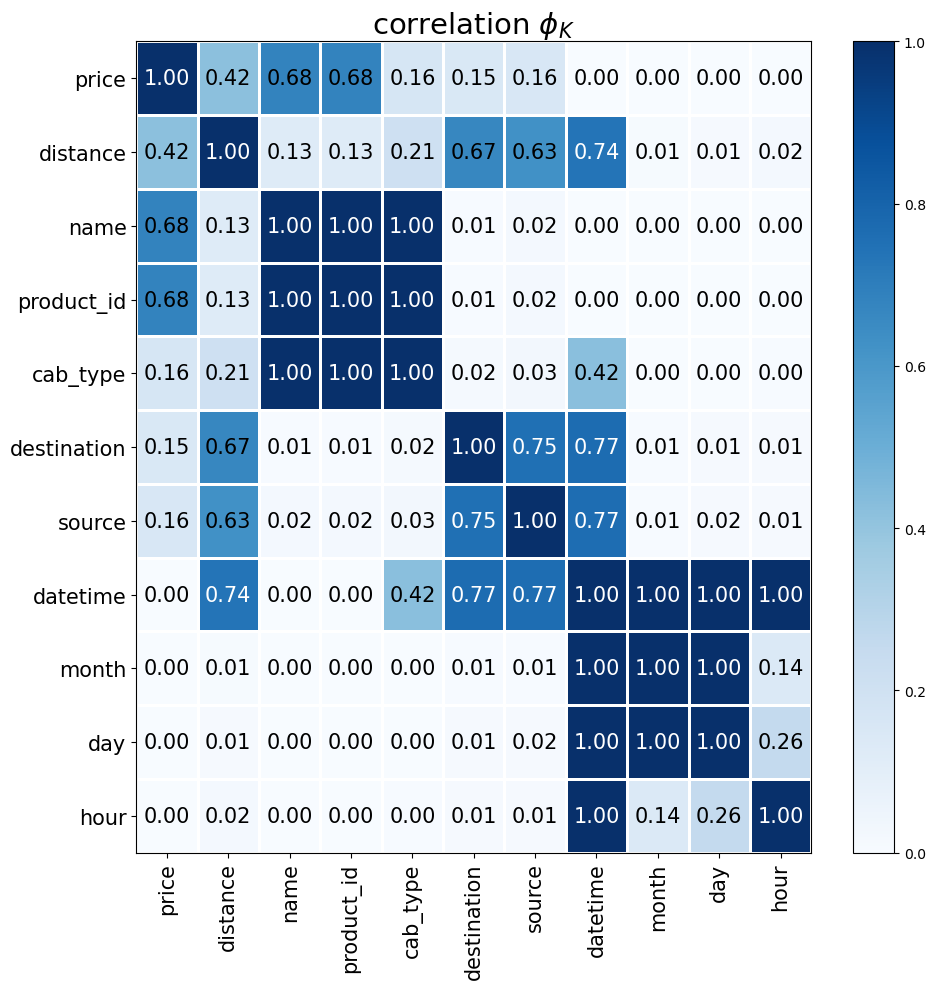

In [86]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

#ploting
plot_phik(set_1)

interval columns not set, guessing: ['surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'price']


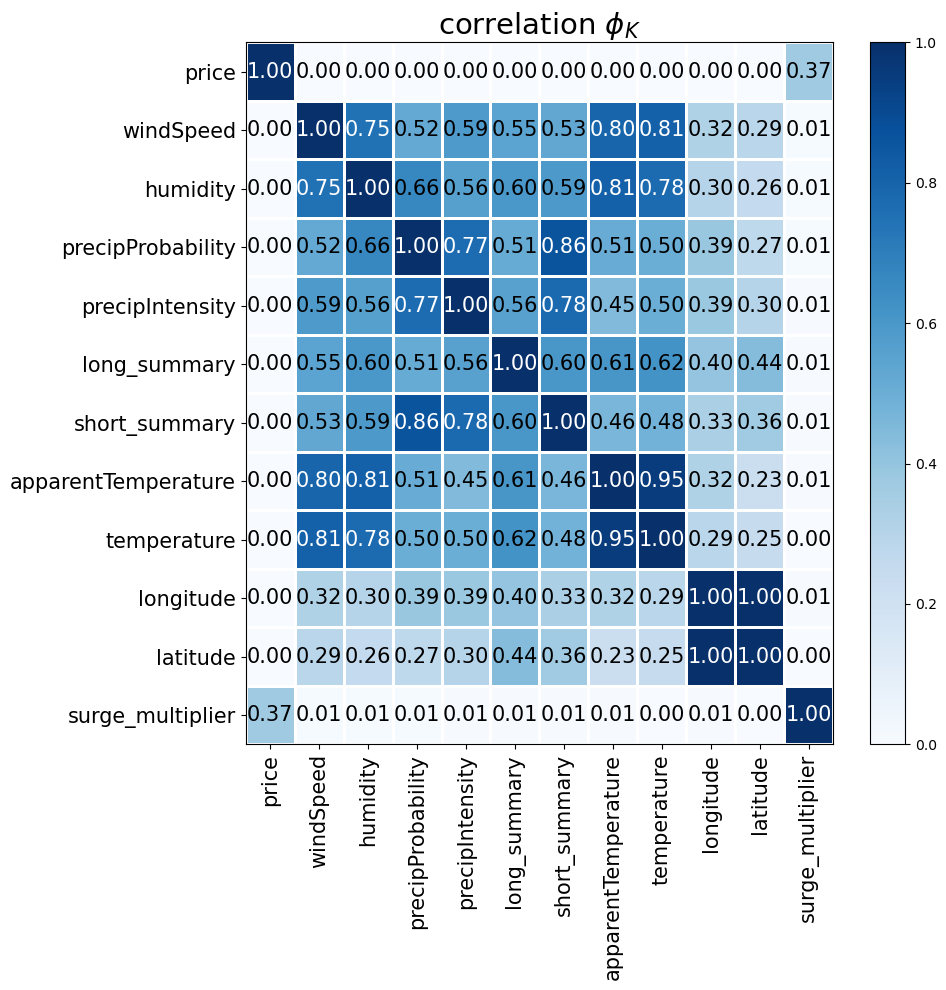

In [87]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

#ploting
plot_phik(set_2)

interval columns not set, guessing: ['windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'price']


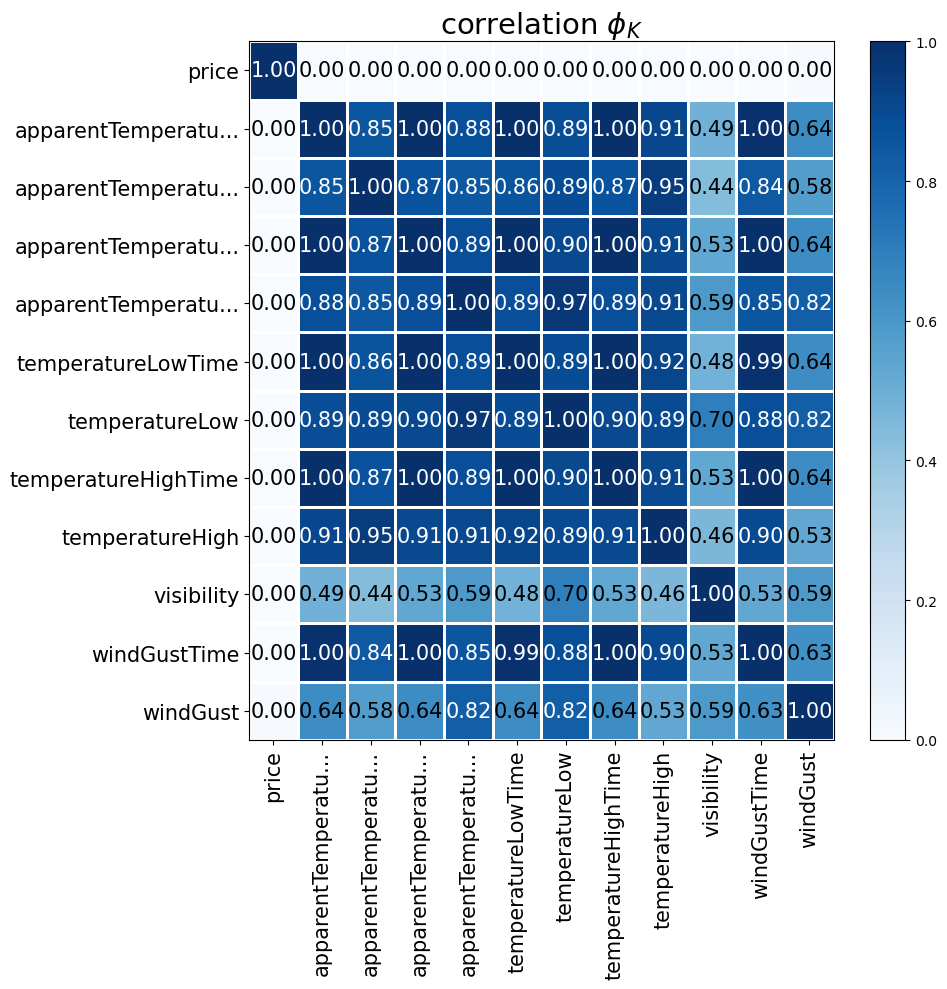

In [88]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

#ploting
plot_phik(set_3)

interval columns not set, guessing: ['dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'price']


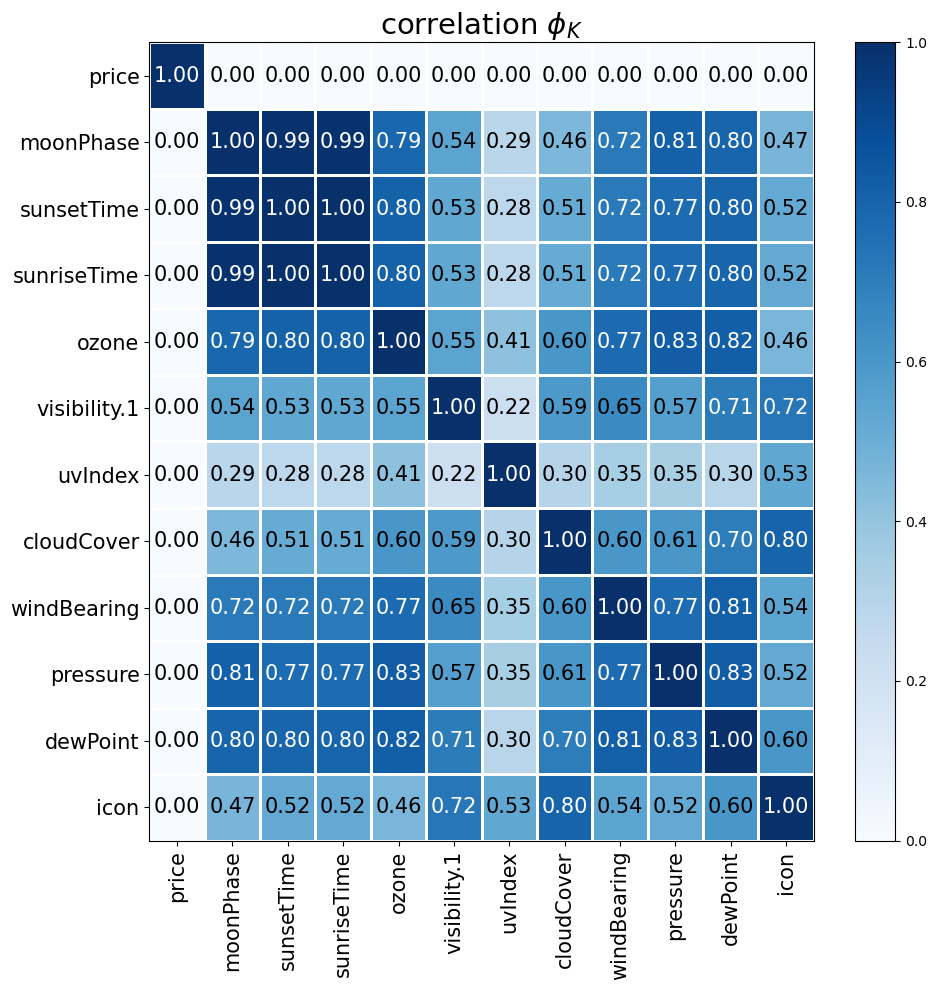

In [89]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

#ploting
plot_phik(set_4)

interval columns not set, guessing: ['precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price']


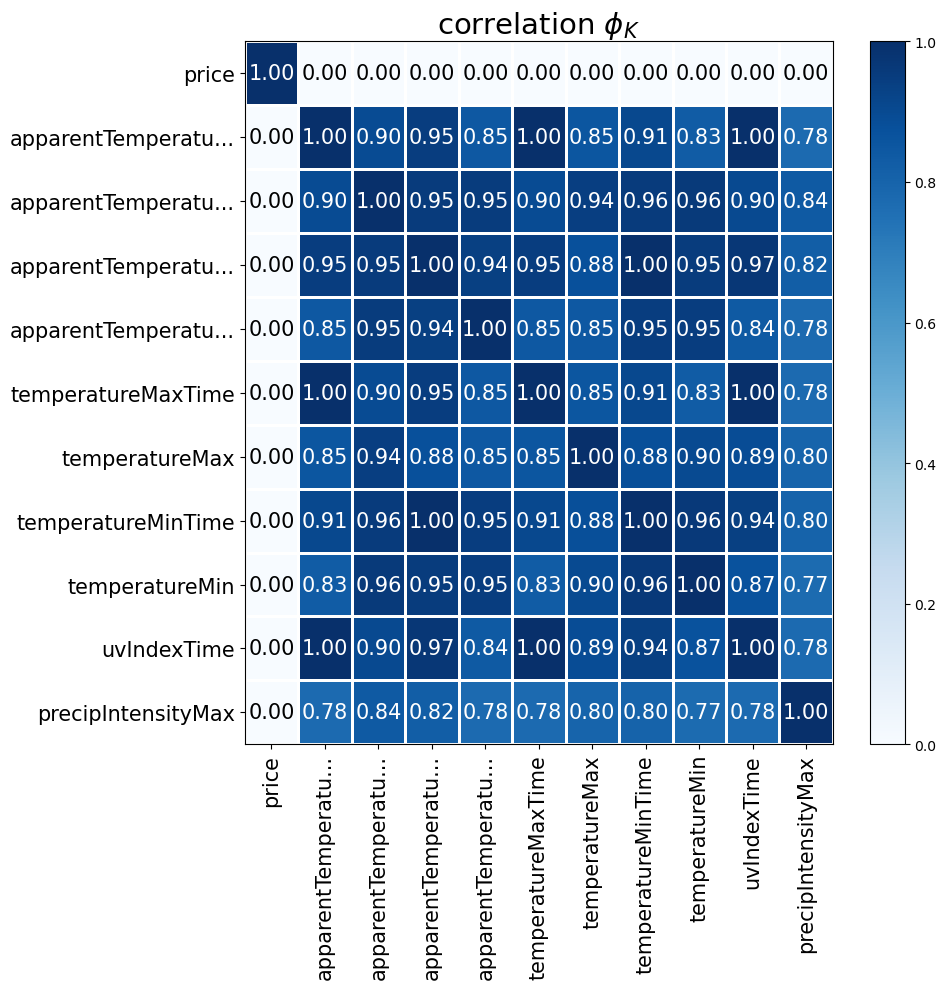

In [90]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

#ploting
plot_phik(set_5)

fitur yang dipakai adalah name,surge_multiplier,distance

In [91]:
# variable baru
features = ['name', 'surge_multiplier', 'distance']

In [92]:
# variable baru untuk dimasukan ke X_train
X_train_features = X_train[features]
X_test_features = X_test[features]

In [93]:
X_train_features

,name,surge_multiplier,distance
399637,Lyft,1.0,0.48
58043,Shared,1.0,1.57
24924,UberXL,1.0,1.64
265184,WAV,1.0,1.16
236718,Lyft,1.0,2.56
...,...,...,...
639432,Black SUV,1.0,2.66
653672,UberPool,1.0,2.25
120705,Black,1.0,2.58
377541,Black SUV,1.0,2.67


### Split numerical columns and categorical columns

memisahkan kolom numerical dan kategorikal

In [94]:
# Memisahkan kolom numerik dan kategorikal
X_train_num  = X_train_features.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_cat  = X_train_features.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerik:")
print(X_train_num)
print("\nKolom Kategorikal:")
print(X_train_cat)


Kolom Numerik:
['surge_multiplier', 'distance']

Kolom Kategorikal:
['name']


### cek cardinality

cek cardnality di dalam data

In [95]:
# cek cardinality 
num_cols = X_train_features.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train_features.select_dtypes(include=object).columns.tolist()

print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['surge_multiplier', 'distance']
categorical columns : ['name']


In [96]:
X_train[cat_cols].nunique()

name    12
dtype: int64

### Scaling 

untuk fitur scaling saya akan menggunakan `minmaxscaler`. alasan kenapa saya menggunakan `minmaxscaler` adalah pendekatan yang sederhana dikarenakan fitur akan diubah menjadi nilai berkisar 0 dan 1.

In [97]:
# scaling menggunakan minmaxscaler
scaler = MinMaxScaler()

X_train_num = X_train_features[num_cols]
X_test_num = X_test_features[num_cols]

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [98]:
print("X_train_num_scaled:")
print(X_train_num_scaled)

print("\nX_test_num_scaled:")
print(X_test_num_scaled)

X_train_num_scaled:
[[0.         0.08518519]
 [0.         0.28703704]
 [0.         0.3       ]
 ...
 [0.         0.47407407]
 [0.         0.49074074]
 [0.         0.32037037]]

X_test_num_scaled:
[[0.         0.51851852]
 [0.         0.31666667]
 [0.         0.5037037 ]
 ...
 [0.         0.18148148]
 [0.         0.81851852]
 [0.         0.31111111]]


### Encoding

In [99]:
# Inisialisasi encoder
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat = X_train_features[cat_cols]
X_test_cat = X_test_features[cat_cols]

# Melakukan one-hot encoding pada data kategorikal untuk X_train dan X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)



In [100]:
print("X_train_num_scaled:")
print(X_train_cat_encoded)

print("\nX_test_num_scaled:")
print(X_test_cat_encoded)

X_train_num_scaled:
  (0, 5)	1.0
  (1, 7)	1.0
  (2, 10)	1.0
  (3, 11)	1.0
  (4, 5)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 7)	1.0
  (10, 9)	1.0
  (11, 7)	1.0
  (12, 5)	1.0
  (13, 1)	1.0
  (14, 6)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 3)	1.0
  (18, 6)	1.0
  (19, 0)	1.0
  (20, 9)	1.0
  (21, 5)	1.0
  (22, 4)	1.0
  (23, 9)	1.0
  (24, 8)	1.0
  :	:
  (505206, 6)	1.0
  (505207, 4)	1.0
  (505208, 0)	1.0
  (505209, 1)	1.0
  (505210, 7)	1.0
  (505211, 10)	1.0
  (505212, 10)	1.0
  (505213, 6)	1.0
  (505214, 6)	1.0
  (505215, 3)	1.0
  (505216, 7)	1.0
  (505217, 10)	1.0
  (505218, 3)	1.0
  (505219, 9)	1.0
  (505220, 0)	1.0
  (505221, 5)	1.0
  (505222, 10)	1.0
  (505223, 9)	1.0
  (505224, 1)	1.0
  (505225, 9)	1.0
  (505226, 1)	1.0
  (505227, 8)	1.0
  (505228, 0)	1.0
  (505229, 1)	1.0
  (505230, 2)	1.0

X_test_num_scaled:
  (0, 2)	1.0
  (1, 3)	1.0
  (2, 8)	1.0
  (3, 6)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 9)	1.0
  (7, 8)	1.0
  (8, 2)	1.0
  (9, 4)	1.0
  (10, 5)	1.0
  (11, 5)	1.0


### Concate columns

In [101]:
# Gabungkan fitur-fitur numerik yang telah di-scaling dan fitur-fitur kategorikal yang telah di-encoded
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)

# Buat DataFrame pandas dari array yang telah dihasilkan, memberikan nama kolom sesuai dengan encoder
X_train_final = pd.DataFrame(X_train_final, columns=num_cols + list(encoder.get_feature_names_out()))
X_test_final = pd.DataFrame(X_test_final, columns=num_cols + list(encoder.get_feature_names_out()))

In [102]:
X_train_final

,surge_multiplier,distance,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.085185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.287037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.211111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.470370,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505226,0.0,0.488889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505227,0.0,0.412963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
505228,0.0,0.474074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505229,0.0,0.490741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


feature engineering selesai sampai disini. dilanjukan dengan fitur masuk ke model.

## 6.Model Definition
Algoritma yang akan digunakan dalam model ini adalah linear regression. Linear Regression dipilih karena beberapa alasan:

1. **Sederhana dan Mudah diinterpretasikan**: Linear Regression adalah salah satu algoritma yang paling sederhana dan mudah diinterpretasikan.

2. **Kemampuan untuk Menangani Hubungan Linier**: Algoritma Linear Regression cocok untuk kasus di mana hubungan antara variabel independen dan variabel dependen diasumsikan linier. 

3. **Komputasi Efisien**: Model Linear Regression memiliki proses pelatihan yang cepat dan efisien, terutama pada dataset dengan jumlah fitur yang relatif kecil. 

4. **Interpretasi Koefisien**: Linear Regression memberikan koefisien yang langsung dapat diinterpretasikan untuk setiap variabel independen, yang memungkinkan untuk mengevaluasi seberapa besar dampaknya terhadap variabel target. 



## 7.Model Training

In [103]:
##Trainig using Linear Regression
model_lin_reg = LinearRegression()

In [104]:
model_lin_reg.fit(X_train_final,y_train)

LinearRegression()

## 8.Model Evaluasi
lakukan evaluasi terhadap kedua set data (train dan test) untuk mengetahui apakah model overfit/underfit/good fit.

In [105]:
# Predict Train-set and Test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 4.04748535,  4.2734375 , 14.12310791, ..., 21.543396  ,
       31.56530762, 15.84173584])

### Model evaluation using MAE

In [106]:
# Buat prediksi untuk data latih dan data uji
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

# Evaluasi model menggunakan MAE
print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set : ', mean_absolute_error(y_test, y_pred_test))


Error - Train set :  1.743666475048975
Error - Test set :  1.7811537367126253


MAE adalah metrik evaluasi yang mengukur rata-rata nilai absolut dari selisih antara prediksi dan nilai aktual. Semakin rendah nilai MAE, semakin baik performa model dalam melakukan prediksi. Dari nilai yang Anda berikan:
* model termasuk good fit.
* Dengan MAE sekitar 1.743 untuk data latih dan 1.781 untuk data uji model  menunjukkan kemampuan dalam memprediksi nilai target dengan kesalahan rata-rata sekitar 1.78 unit. Ini mengindikasikan bahwa model memiliki kinerja yang baik dalam menangani masalah prediksi, namun, evaluasi lebih lanjut dan kontekstualisasi dalam aplikasi bisnis yang spesifik masih diperlukan untuk menilai secara menyeluruh nilai tambah yang diberikan oleh model ini.

In [107]:
print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.9295908856448019
R2 Score - Test Set  :  0.9273614187852235


R2 Score adalah metrik evaluasi yang mengukur seberapa baik model regresi cocok dengan data, dengan nilai berkisar antara 0 dan 1. Dari nilai yang didapat:
- R2 Score untuk data Train set adalah sekitar 0.92.
- R2 Score untuk data Test set adalah sekitar 0.92.

Kedua nilai ini menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variasi dalam data, baik pada Train set maupun Test Set . Hal ini menandakan bahwa model dapat menggeneralisasi dengan baik dari data latih ke data baru yang belum pernah dilihat sebelumnya (data uji).

## 9.Save model
dilakukan untuk menyimpan model yang sudah jadi apabila mau digunakan di sebuah aplikasi.

In [108]:
#Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_cols, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

model sudah tersimpan dalam bentuk file pickle (.pkl)

## 10.Conclusion

Berdasarkan hasil analisis data, saya dapat menyimpulkan beberapa temuan utama berdasarkan EDA :

1. Distribusi Harga: Distribusi harga pada dataset cenderung condong ke arah kiri, dengan sebagian besar harga berkumpul di rentang harga yang lebih rendah, khususnya antara 0 hingga 20.

2. Variasi Harga Berdasarkan Nama Grup: Terdapat variasi yang signifikan dalam harga antara nama-nama grup yang berbeda. Beberapa nama grup memiliki harga yang lebih tinggi dan beberapa memiliki harga yang lebih rendah.

3. Pengamatan pada Data Bulan dan Hari: Data dalam dataset hanya mencakup bulan November dan Desember. Selain itu, terdapat gap dalam data 'day' di mana tidak ada data yang tersedia untuk hari ke-5 hingga ke-8.

4. Persentase Harga Tertinggi dan Terendah: Persentase harga tertinggi untuk 'Lyft' dan persentase harga terendah untuk 'Uber' dapat dihitung berdasarkan total harga masing-masing jenis layanan.

5. Konsistensi Data pada Fitur Source: Dari pengamatan, setiap fitur source memiliki jumlah data yang hampir sama, yaitu sekitar 50.000 data. Hal ini menunjukkan konsistensi dalam jumlah data yang dikumpulkan dari setiap source.

Dengan demikian, pemahaman atas karakteristik data tersebut dapat memberikan wawasan yang berharga dalam memahami tren, variabilitas, dan kecenderungan dalam dataset. Informasi ini dapat digunakan untuk pengambilan keputusan yang lebih baik dalam berbagai konteks, seperti pengaturan harga, perencanaan operasional, dan analisis pasar.

## Conceptual Problems
### Assumption


#### Linear Relationship

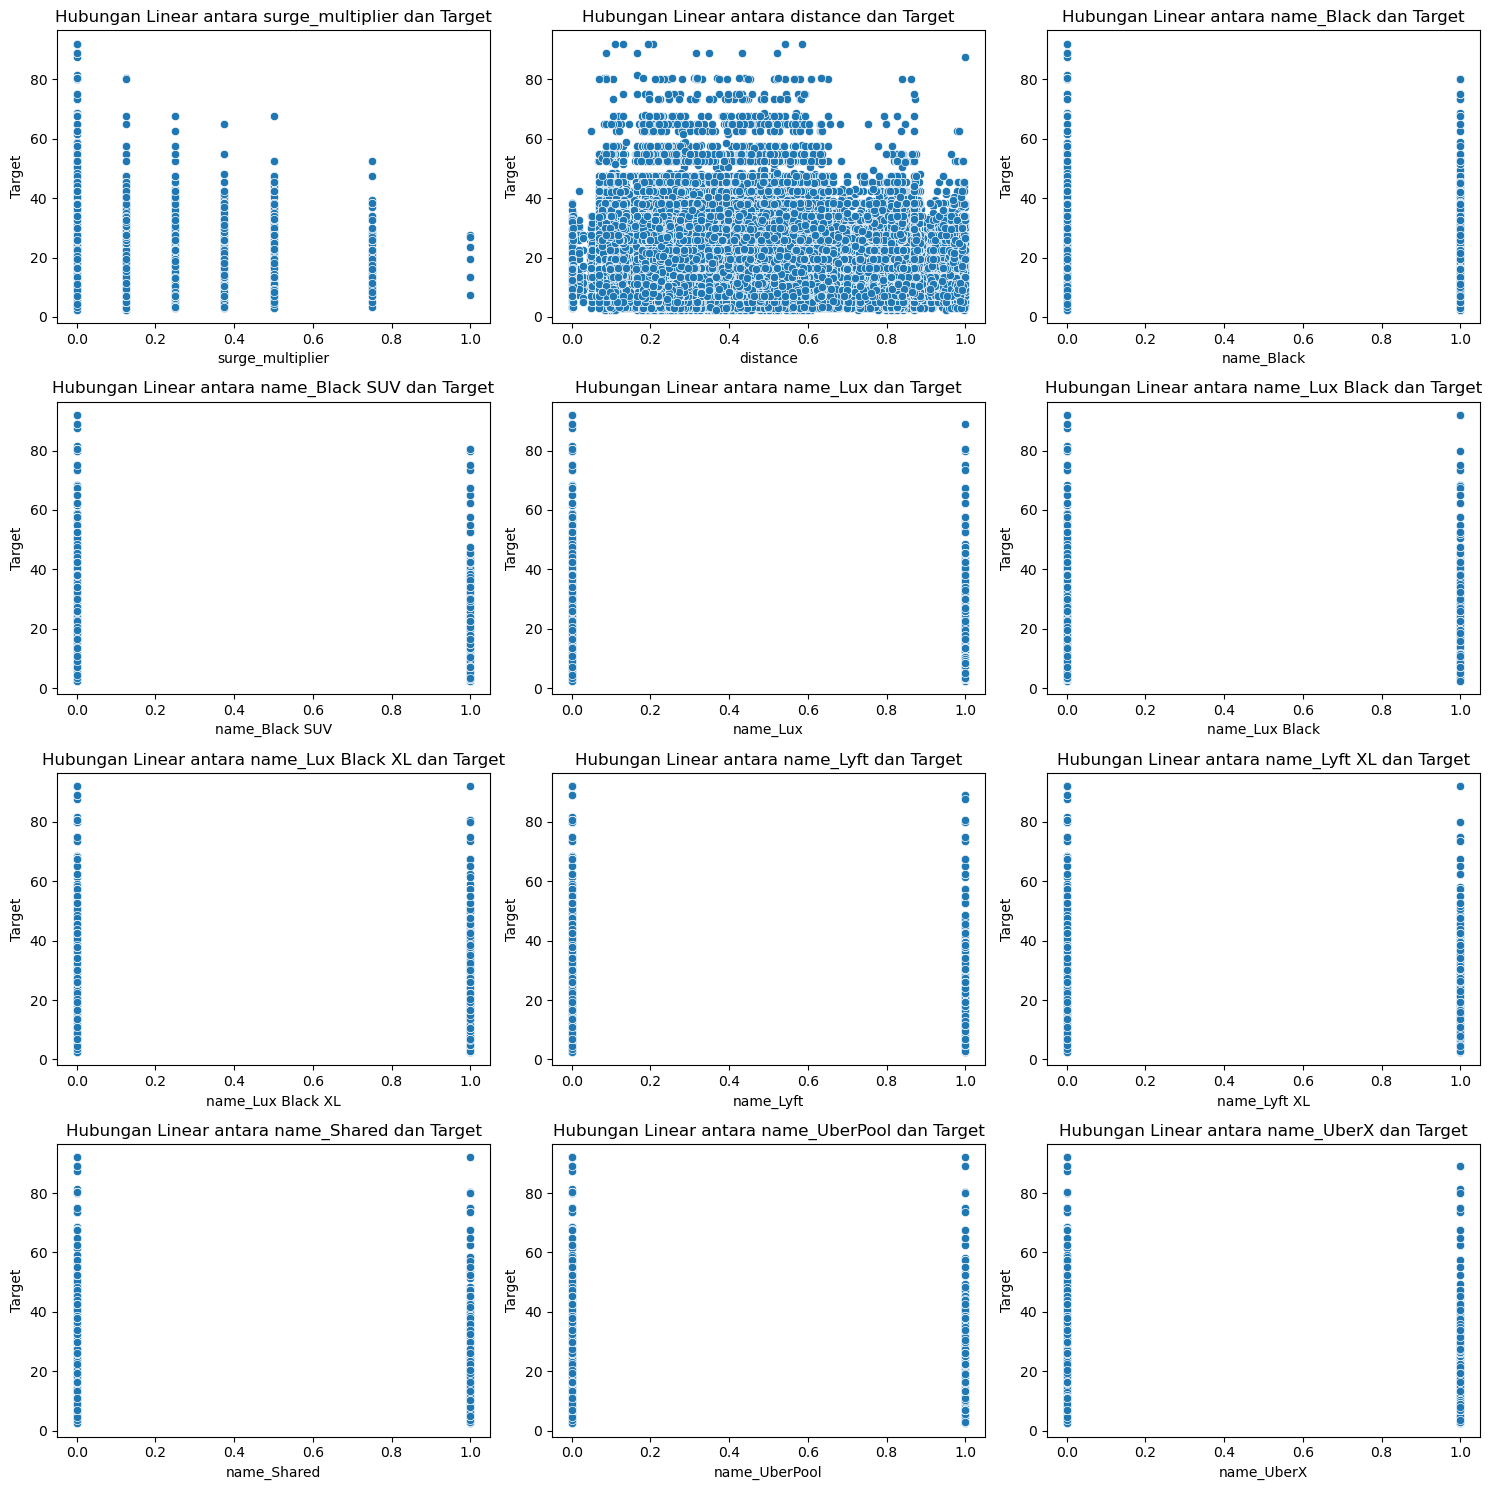

In [109]:
# Menentukan ukuran gambar dan grid
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Membuat scatter plot untuk setiap fitur dalam X_train_feature
for i, ax in enumerate(axes.flatten()):
    if i < len(X_train_final.columns):
        sns.scatterplot(x=X_train_final.iloc[:, i], y=y_train, ax=ax)
        ax.set_title(f'Hubungan Linear antara {X_train_final.columns[i]} dan Target')
        ax.set_xlabel(X_train_final.columns[i])
        ax.set_ylabel('Target')
    else:
        ax.axis('off')  # Menonaktifkan subplot yang tidak digunakan

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


Asumsi Linear Regression:

1. **Hubungan Linier**: Variabel independen dan dependen memiliki hubungan linier. Perubahan dalam variabel independen menghasilkan perubahan yang proporsional dalam variabel dependen.

2. **Independensi Residual**: Residual (selisih antara nilai observasi dan nilai prediksi) adalah independen satu sama lain dan tidak memiliki pola. Tidak ada korelasi antara residu.

3. **Homoskedastisitas**: Variansi residual tetap konstan di semua nilai prediksi. Tidak ada pola dalam sebaran residual seiring dengan perubahan nilai prediksi.

4. **Tidak Ada Multikolinieritas**: Tidak ada hubungan linear sempurna antara dua atau lebih variabel independen. Hal ini menghindari masalah dalam estimasi koefisien regresi dan interpretasi yang sulit.

5. **Normalitas Residual**: Residual mengikuti distribusi normal. Sebagian besar nilai residual terpusat di sekitar nol dan memiliki distribusi yang simetris.

6. **Tidak Ada Outlier**: Tidak ada pengamatan yang signifikan menyimpang dari pola umum dalam data. Outlier dapat memiliki dampak besar terhadap hasil model dan menghasilkan estimasi parameter yang bias.

#### slope dan intercept

In [110]:
slope = model_lin_reg.coef_
intercept = model_lin_reg.intercept_

print("Nilai Slope (Koefisien Regresi): ", slope)
print("Nilai Intercept: ", intercept)


Nilai Slope (Koefisien Regresi):  [3.68625552e+01 1.54064314e+01 4.78744145e+11 4.78744145e+11
 4.78744145e+11 4.78744145e+11 4.78744145e+11 4.78744145e+11
 4.78744145e+11 4.78744145e+11 4.78744145e+11 4.78744145e+11
 4.78744145e+11 4.78744145e+11]
Nilai Intercept:  -478744145170.5097


dari data slope dan intercept diatas. memiliki magnitudo yang sangat besar, ini bisa mengindikasikan bahwa model tidak melakukan normalisasi atau scaling pada fitur-fitur dengan benar sebelum melatih model. 

## Model Analysis

Berdasarkan nilai Mean Absolute Error (MAE) dan R2 Score yang didapat tentang performa model sebagai berikut:

1. **Mean Absolute Error (MAE)**:
   * Train Set: 1.74
   * Test Set: 1.78
   MAE adalah metrik evaluasi yang mengukur rata-rata nilai absolut dari selisih antara prediksi dan nilai aktual. Semakin rendah nilai MAE, semakin baik performa model. Dalam kasus ini, nilai MAE yang rendah menunjukkan bahwa model cenderung membuat prediksi yang akurat, baik untuk data latih maupun data uji.

2. **R2 Score**:
   * Train Set: 0.92
   * Test Set: 0.92
   R2 Score  mengukur seberapa baik variabilitas dari target yang dapat dijelaskan oleh fitur-fitur yang ada dalam model. Nilai R2 Score berkisar antara 0 hingga 1, di mana semakin mendekati 1 menunjukkan model yang lebih baik dalam menjelaskan variabilitas data. Dalam kasus ini, nilai R2 Score yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variabilitas harga.

Berdasarkan hasil ini, model regresi tampaknya memiliki kinerja yang baik dengan nilai MAE yang rendah dan R2 Score yang tinggi baik untuk data latih maupun data uji. Ini menunjukkan bahwa model mampu memberikan prediksi yang akurat dan memiliki kemampuan yang baik dalam menjelaskan variasi harga. Namun, pastikan untuk memvalidasi dan menguji model dengan dataset yang lebih luas dan beragam untuk memastikan keandalan dan generalisasi model.

## Kelebihan & Kelemahan

### Kelebihan Model Regresi:
1. pemahaman yang jelas tentang hubungan antara variabel.
2. prediksi yang stabil dan konsisten untuk data baru jika representasi data baik.
3. Dapat mengidentifikasi variabel yang berpengaruh signifikan terhadap variabel target.

### Kelemahan Model Regresi:
1. Model mengasumsikan hubungan linier antara variabel, yang mungkin tidak selalu terjadi.
2. Rentan terhadap gangguan oleh outlier, yang dapat memengaruhi akurasi prediksi.
3. Memerlukan konversi variabel kategorikal menjadi bentuk numerik, yang bisa menyebabkan kehilangan informasi atau bias.


## Improvement

Untuk meningkatkan model regresi yang telah dibuat, berikut beberapa rekomendasi perbaikan selanjutnya:

1. Penggunaan Fitur Tambahan lebih spesifik.

2. Penanganan Outlier yang lebih mendalam terhadap data.

3. Optimasi Hyperparameter untuk menemukan kombinasi yang lebih optimal.

4. Peningkatan Pengumpulan Data.

5. Analisis Lebih Mendalam.

Dengan mengimplementasikan rekomendasi ini, kita dapat meningkatkan kinerja dan keandalan model regresi, sehingga dapat memberikan nilai tambah yang lebih besar dalam konteks bisnis yang dihadapi.

## Overall Analysis

Dalam analisis keseluruhan, model regresi yang dibuat menunjukkan kinerja yang baik dengan MAE yang rendah dan R2 Score yang tinggi untuk kedua data latih dan data uji. Dan masih ada beberapa hal yang harus di improve untuk membuat model lebih baik dan efisien dalam menjalankan program nya. 